# Big Data y Machine Learning (UBA) -  2025

## Trabajo Práctico 1: Jugando con APIs y WebScraping 

### Reglas de formato y presentación
- El trabajo debe estar debidamente documentado comentado (utilizando #) para que tanto los docentes como sus compañeros puedan comprender el código fácilmente.

- El mismo debe ser completado en este Jupyter Notebook y entregado como tal, es decir en un archivo .ipynb


### Fecha de entrega:
Viernes 4 de Abril a las 13:00 hs

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub llamado “Entrega final del tp”. 
- Asegurense de haber creado una carpeta llamada TP1. Este Jupyter Notebook y el correspondiente al TP1 deben estar dentro de esa carpeta.
- También deben enviar el link de su repositorio -para que pueda ser clonado y corregido- a mi correo 25RO35480961@campus.economicas.uba.ar. Usar de asunto de email <i>"Big Data - TP 1 - Grupo #"</i> y nombrar el archivo <i>"TP1_Grupo #"</i> donde # es el número de grupo que le fue asignado.
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que: 
    - No envien el correo hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. 
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija.
- En resumen, la carpeta del repositorio debe incluir:
    - El codigo
    - Un documento Word (Parte A) donde esten las figuras y una breve descripción de las mismas.
    - El excel con los links webscrappeados (Parte B)

### Parte A

#### Ejercicio 1 - Jugando con APIs
Usando la API del Banco Mundial [link](https://wbdata.readthedocs.io/en/stable/) , obtener dos series de indicadores para dos paises a elección en una consulta de búsqueda. Pueden buscar serie de indicadores de su interés.

In [8]:
import requests                # Importa la biblioteca requests para hacer solicitudes HTTP a la API del Banco Mundial
import pandas as pd            # Importa pandas para manejar los datos en estructuras tipo DataFrame
from tabulate import tabulate  # Importa tabulate para mostrar los datos en formato de tabla legible en la consola

# Definir los países e indicadores
countries = ["ARG", "BRA"]     # Lista con los códigos de países (Argentina y Brasil)
indicators = {
    "SP.POP.TOTL": "Población Total",    
    "NY.GDP.MKTP.CD": "PIB Total (USD)"  
}

# Crear una lista para almacenar los datos obtenidos
data = []

# Recorrer cada país e indicador
for country in countries:  # Itera sobre la lista de países
    for indicator, indicator_name in indicators.items():  # Itera sobre los indicadores y sus nombres descriptivos
        page = 1  
        while True:  
            # Construir la URL para solicitar datos del Banco Mundial
            url = f"http://api.worldbank.org/v2/country/{country}/indicator/{indicator}?format=json&per_page=1000&page={page}"
            response = requests.get(url)  # Realiza la solicitud HTTP GET

            # Verificar si la solicitud fue exitosa (código 200)
            if response.status_code == 200:
                json_data = response.json()  # Convierte la respuesta a formato JSON

                # Verificar si hay datos disponibles en la respuesta
                if len(json_data) > 1 and json_data[1] is not None:
                    for record in json_data[1]:  # Itera sobre los registros de datos obtenidos
                        if record["value"] is not None:  # Verifica que haya un valor numérico en el registro
                            # Filtrar para obtener solo años desde el 2000 en adelante
                            if int(record["date"]) >= 2000:
                                data.append([
                                    record["country"]["value"],  # Nombre del país
                                    indicator_name,              # Nombre del indicador
                                    int(record["date"]),         # Año del dato
                                    f"{record['value']:,.2f}"    # Valor del indicador con formato numérico legible
                                ])
                    # Verificar si hay más páginas de datos en la API
                    if page < json_data[0]["pages"]:
                        page += 1  # Avanza a la siguiente página
                    else:
                        break      # Si no hay más páginas, salir del bucle
                else:
                    print(f"No hay datos disponibles para {country} - {indicator_name}.")
                    break          # Si no hay datos, salir del bucle
            else:
                print(f"Error al obtener datos para {country} - {indicator_name}")  # Mensaje en caso de error en la solicitud
                break  # Salir del bucle si hay un error

# Convertir los datos obtenidos en un DataFrame de pandas
df = pd.DataFrame(data, columns=["País", "Indicador", "Año", "Valor"])

# Verificar si el DataFrame no está vacío antes de imprimirlo
if not df.empty:
    # Ordenar el DataFrame por país y año en orden descendente
    df = df.sort_values(["País", "Año"], ascending=[True, False])
    print(tabulate(df, headers='keys', tablefmt='grid'))  # Imprimir en formato tabla legible en la consola
else:
    print("No se obtuvieron datos para ninguno de los países o indicadores.")  


+----+-----------+-----------------+-------+----------------------+
|    | País      | Indicador       |   Año | Valor                |
+====+===========+=================+=======+======================+
|  0 | Argentina | Población Total |  2023 | 45,538,401.00        |
+----+-----------+-----------------+-------+----------------------+
| 24 | Argentina | PIB Total (USD) |  2023 | 646,075,277,525.12   |
+----+-----------+-----------------+-------+----------------------+
|  1 | Argentina | Población Total |  2022 | 45,407,904.00        |
+----+-----------+-----------------+-------+----------------------+
| 25 | Argentina | PIB Total (USD) |  2022 | 632,790,070,063.12   |
+----+-----------+-----------------+-------+----------------------+
|  2 | Argentina | Población Total |  2021 | 45,312,281.00        |
+----+-----------+-----------------+-------+----------------------+
| 26 | Argentina | PIB Total (USD) |  2021 | 486,564,085,480.04   |
+----+-----------+-----------------+-------+----

#### Ejercicio 2 - Repaso de Pandas
Realicen una estadistica descriptiva de ambas series de indicadores comparando los dos países.

In [4]:
import requests
import pandas as pd
from tabulate import tabulate

# Definir los países e indicadores
countries = ["ARG", "BRA"]  # Argentina y Brasil
indicators = {
    "SP.POP.TOTL": "Población Total",
    "NY.GDP.MKTP.CD": "PIB Total (USD)"
}

# Crear una lista para almacenar los datos
data = []

# Recorrer cada país e indicador
for country in countries:
    for indicator, indicator_name in indicators.items():
        page = 1
        while True:
            # Construir la URL para la página actual
            url = f"http://api.worldbank.org/v2/country/{country}/indicator/{indicator}?format=json&per_page=1000&page={page}"
            response = requests.get(url)

            # Verificar si la solicitud fue exitosa
            if response.status_code == 200:
                json_data = response.json()

                # Verificar si hay datos disponibles
                if len(json_data) > 1 and json_data[1] is not None:
                    for record in json_data[1]:
                        if record["value"] is not None:
                            # Filtrar para obtener solo años desde 2010 en adelante
                            if int(record["date"]) >= 2000:
                                data.append([
                                    record["country"]["value"],
                                    indicator_name,
                                    int(record["date"]),
                                    round(float(record["value"]), 2)
                                ])
                    # Verificar si hay más páginas
                    if page < json_data[0]["pages"]:
                        page += 1
                    else:
                        break
                else:
                    print(f"No hay datos disponibles para {country} - {indicator_name}.")
                    break
            else:
                print(f"Error al obtener datos para {country} - {indicator_name}")
                break

# Convertir los datos en un DataFrame de pandas
df = pd.DataFrame(data, columns=["País", "Indicador", "Año", "Valor"])

# Verificar si el DataFrame no está vacío
if not df.empty:
    # Ordenar el DataFrame por país y año
    df = df.sort_values(["País", "Año"], ascending=[True, False])
    print("\nDatos Recopilados:")
    print(tabulate(df, headers='keys', tablefmt='grid'))  # Imprimir en formato tabla mejorado
    
    # Análisis Estadístico Descriptivo
    print("\nAnálisis Estadístico Descriptivo:")
    comparativo = []
    for indicator_name in df["Indicador"].unique():
        subset = df[df["Indicador"] == indicator_name]
        print(f"\n{indicator_name} - Estadísticas Generales:")
        stats = subset.groupby("País")["Valor"].describe()
        stats["Varianza"] = subset.groupby("País")["Valor"].var()
        stats = stats.round(2)  # Redondear todos los valores a 2 decimales
        print(tabulate(stats, headers='keys', tablefmt='grid'))  # Imprimir tabla con formato bonito
        
        # Agregar datos al recuadro comparativo
        for country in countries:
            if country in stats.index:
                comparativo.append([
                    country, indicator_name, stats.loc[country, "mean"], stats.loc[country, "std"], stats.loc[country, "Varianza"]
                ])
    
    # Crear DataFrame para la comparación
    comparativo_df = pd.DataFrame(comparativo, columns=["País", "Indicador", "Media", "Desviación Estándar", "Varianza"])
    print("\nComparación de Indicadores Entre Países:")
    print(tabulate(comparativo_df, headers='keys', tablefmt='grid'))  # Imprimir tabla comparativa mejorada
else:
    print("No se obtuvieron datos para ninguno de los países o indicadores.")





Datos Recopilados:
+----+-----------+-----------------+-------+-------------+
|    | País      | Indicador       |   Año |       Valor |
+====+===========+=================+=======+=============+
|  0 | Argentina | Población Total |  2023 | 4.55384e+07 |
+----+-----------+-----------------+-------+-------------+
| 24 | Argentina | PIB Total (USD) |  2023 | 6.46075e+11 |
+----+-----------+-----------------+-------+-------------+
|  1 | Argentina | Población Total |  2022 | 4.54079e+07 |
+----+-----------+-----------------+-------+-------------+
| 25 | Argentina | PIB Total (USD) |  2022 | 6.3279e+11  |
+----+-----------+-----------------+-------+-------------+
|  2 | Argentina | Población Total |  2021 | 4.53123e+07 |
+----+-----------+-----------------+-------+-------------+
| 26 | Argentina | PIB Total (USD) |  2021 | 4.86564e+11 |
+----+-----------+-----------------+-------+-------------+
|  3 | Argentina | Población Total |  2020 | 4.5192e+07  |
+----+-----------+-----------------+

#### Ejercicio 3 - Practicando con Matplotlib
Armen dos gráficos distintos usando la librería Matplotlib (repasen Clase 4). Uno programandolo con el estilo *pyplot* y otro gráfico de estilo *orientada a objetos*

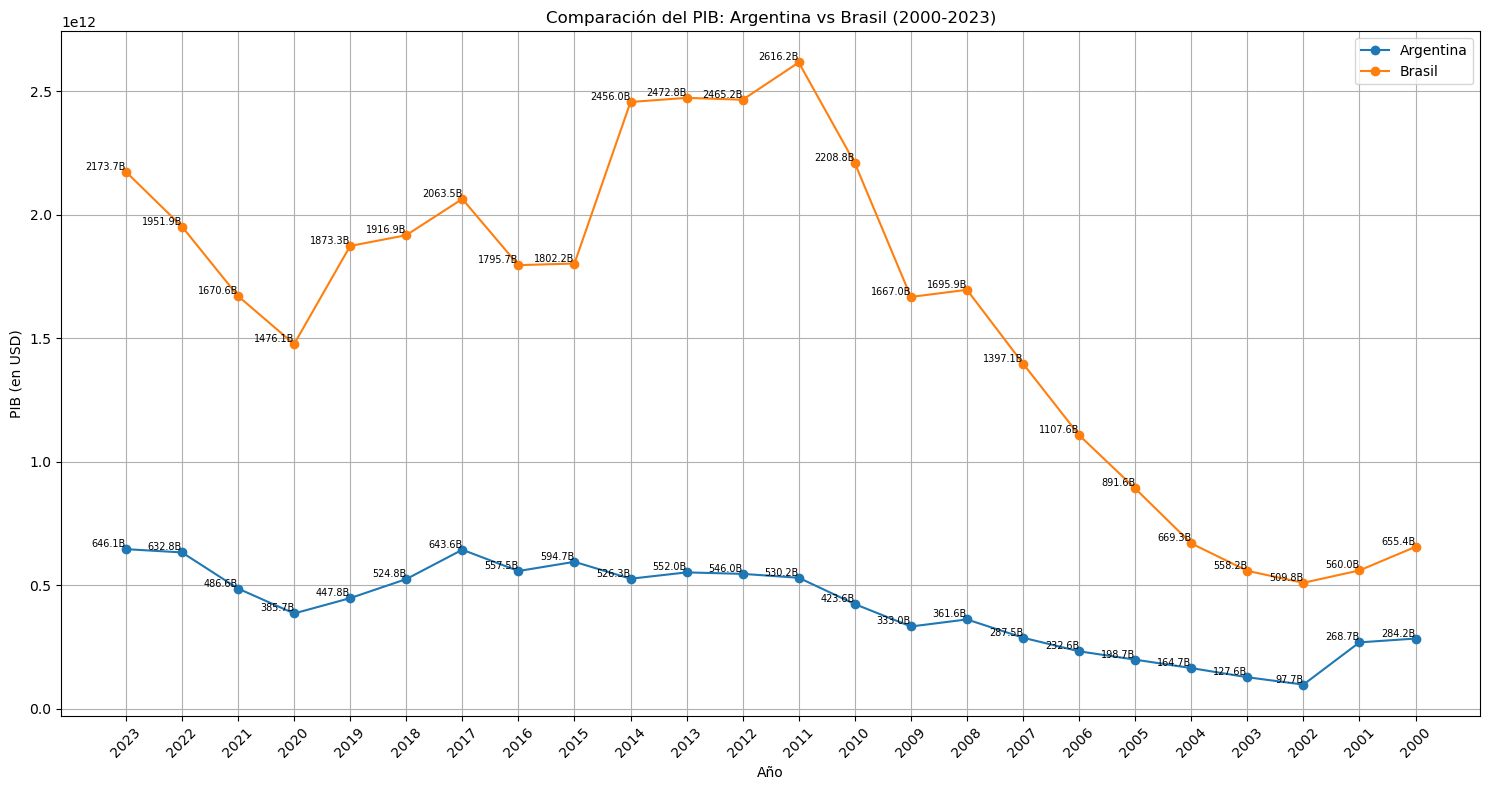

In [1]:
# Resolver acá estilo pyplot
import pandas as pd
import matplotlib.pyplot as plt
import requests

# Función para obtener el PIB de un país desde la API del Banco Mundial
def obtener_pib(pais, inicio, fin):
    url = f'http://api.worldbank.org/v2/country/{pais}/indicator/NY.GDP.MKTP.CD?date={inicio}:{fin}&format=json'
    respuesta = requests.get(url)

    # Comprobamos si la solicitud fue exitosa
    if respuesta.status_code == 200:
        datos = respuesta.json()[1]
        anios = [dato['date'] for dato in datos]
        pib = [dato['value'] for dato in datos]

        return anios, pib
    else:
        print("Error al obtener datos: ", respuesta.status_code)
        return [], []

# Función para abreviar números grandes
def abreviar_numero(valor):
    if valor >= 1_000_000_000:
        return f'{valor / 1_000_000_000:.1f}B'
    elif valor >= 1_000_000:
        return f'{valor / 1_000_000:.1f}M'
    elif valor >= 1_000:
        return f'{valor / 1_000:.1f}K'
    return str(valor)

# Especificamos los parámetros
paises = {
    'Argentina': 'ARG',
    'Brasil': 'BRA'
}
anio_inicio = 2000
anio_fin = 2023

# Almacenamos los datos en un DataFrame
df = pd.DataFrame()

for pais, codigo in paises.items():
    anios, pib = obtener_pib(codigo, anio_inicio, anio_fin)
    df[pais] = pib

# Establecemos los años como índice
df.index = anios

# Graficamos los PIBs
plt.figure(figsize=(15, 8))
plt.plot(df.index, df['Argentina'], marker='o', label='Argentina')
plt.plot(df.index, df['Brasil'], marker='o', label='Brasil')

# Añadir etiquetas con los datos, abreviados
for i, valor in enumerate(df['Argentina']):
    plt.text(df.index[i], valor, abreviar_numero(valor), fontsize=7, ha='right', va='bottom')

for i, valor in enumerate(df['Brasil']):
    plt.text(df.index[i], valor, abreviar_numero(valor), fontsize=7, ha='right', va='bottom')

plt.title('Comparación del PIB: Argentina vs Brasil (2000-2023)')
plt.xlabel('Año')
plt.ylabel('PIB (en USD)')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [4]:
# Resolver acá estilo orientado-objetos 
# Tip: aprovechar este estilo de programar una figura para hacerlo más lindo 
import requests
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets

# Definir las URLs para la población de varios países
countries = ['ARG', 'BRA', 'CHL', 'COL', 'MEX', 'PER', 'URY', 
             'FRA', 'DEU', 'ESP', 'ITA', 'USA', 'CAN', 'JPN', 'IND', 'CHN']
years = [2016,2017,2018,2019, 2020, 2021, 2022, 2023]

# Cargar datos de la API del Banco Mundial
data = []
for year in years:
    for country in countries:
        response = requests.get(f'http://api.worldbank.org/v2/country/{country}/indicator/SP.POP.TOTL?date={year}&format=json')
        json_data = response.json()
        if len(json_data) > 1 and 'value' in json_data[1][0]:
            population = json_data[1][0]['value']
            country_name = json_data[1][0]['country']['value']
            data.append({'Country': country_name, 'Year': year, 'Population': population})

# Convertir a un DataFrame de Pandas
df = pd.DataFrame(data)

# Filtrar valores nulos si existen
df = df.dropna(subset=['Population'])

def plot_population(year):
    # Filtrar el DataFrame por el año seleccionado
    filtered_data = df[df['Year'] == year]

    # Crear un gráfico de barras
    plt.figure(figsize=(12, 7))
    bars = plt.bar(filtered_data['Country'], filtered_data['Population'], color=plt.cm.tab10.colors, width=0.5)
    plt.title(f'Población de países seleccionados en {year}')
    plt.xlabel('País')
    plt.ylabel('Población')
    plt.ylim(0, max(filtered_data['Population']) * 1.1)

    plt.tight_layout()
    plt.show()

# Crear un slider para seleccionar el año
year_slider = widgets.IntSlider(value=2016, min=2016, max=2023, step=1, description='Año:')
widgets.interactive(plot_population, year=year_slider)


interactive(children=(IntSlider(value=2016, description='Año:', max=2023, min=2016), Output()), _dom_classes=(…

### Parte B

#### Ejercicio 4
De la página de noticias del [diario La Nación](https://www.lanacion.com.ar/) o cualquier diario que les interese, utilicen herramientas de web scraping para obtener los **links** de las noticias de la portada. Guarden los links obtenidos en un dataframe y expórtenlo a un archivo de excel.

Nota 1: es posible que logren obtener los links a las noticias sin el dominio: "https://www.lanacion.com.ar/". De ser así, concatenen el dominio a la ruta del link obtenido, tal que se obtenga un link al que se pueda acceder. Es decir, que las cadenas de caracteres finales tendrán la forma: https://www.lanacion.com.ar/*texto_obtenido*)

Nota 2: junto con su entrega, adjunten una captura de la página de noticias al momento de correr su código. Eso servirá al momento de la corrección para verificar que los links obtenidos hacen referencia a las noticias de ese día y hora.

In [16]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL de la página principal de La Nación
url = "https://www.lanacion.com.ar/"

# Realizamos una solicitud HTTP GET para obtener la página
response = requests.get(url)

# Verificamos si la solicitud fue exitosa (código 200)
if response.status_code == 200:
    # Analizamos el contenido HTML con BeautifulSoup
    soup = BeautifulSoup(response.content, 'html.parser')

    # Buscamos los enlaces de las noticias principales en la portada
    links = []
    for a_tag in soup.find_all('a', href=True):
        href = a_tag['href']
        
        # Filtramos solo los enlaces que pertenecen a noticias de La Nación
        if href.startswith("/") or "lanacion.com.ar" in href:
            full_link = f"https://www.lanacion.com.ar{href}" if href.startswith("/") else href
            links.append(full_link)

    # Eliminamos duplicados en la lista de enlaces
    links = list(set(links))

    # Crear un DataFrame con los enlaces obtenidos
    df = pd.DataFrame(links, columns=["Enlaces de noticias"])

    # Exportar el DataFrame a un archivo Excel
    df.to_excel('noticias_portada_lanacion.xlsx', index=False)

    print("✅ Los enlaces de las noticias de la portada han sido guardados en 'grupo7.xlsx'.")
else:
    print(f"❌ Error al acceder a la página: {response.status_code}")



✅ Los enlaces de las noticias de la portada han sido guardados en 'grupo7.xlsx'.
